In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 01 - exploratory analysis

Verifying how much data is complete in columns

In [51]:
columns = train.columns
for i in columns:
    print('%s column has %i entries and has %i null values ' % (i,len(train[i]),train[i].isnull().sum()))

PassengerId column has 891 entries and has 0 null values 
Survived column has 891 entries and has 0 null values 
Pclass column has 891 entries and has 0 null values 
Name column has 891 entries and has 0 null values 
Sex column has 891 entries and has 0 null values 
Age column has 891 entries and has 177 null values 
SibSp column has 891 entries and has 0 null values 
Parch column has 891 entries and has 0 null values 
Ticket column has 891 entries and has 0 null values 
Fare column has 891 entries and has 0 null values 
Cabin column has 891 entries and has 687 null values 
Embarked column has 891 entries and has 2 null values 


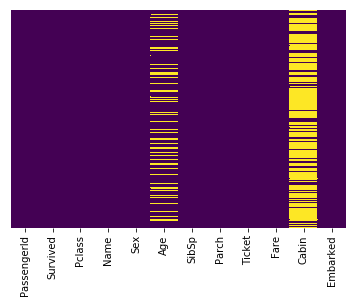

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [52]:
train.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [56]:
sns.set_style('whitegrid')

C:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


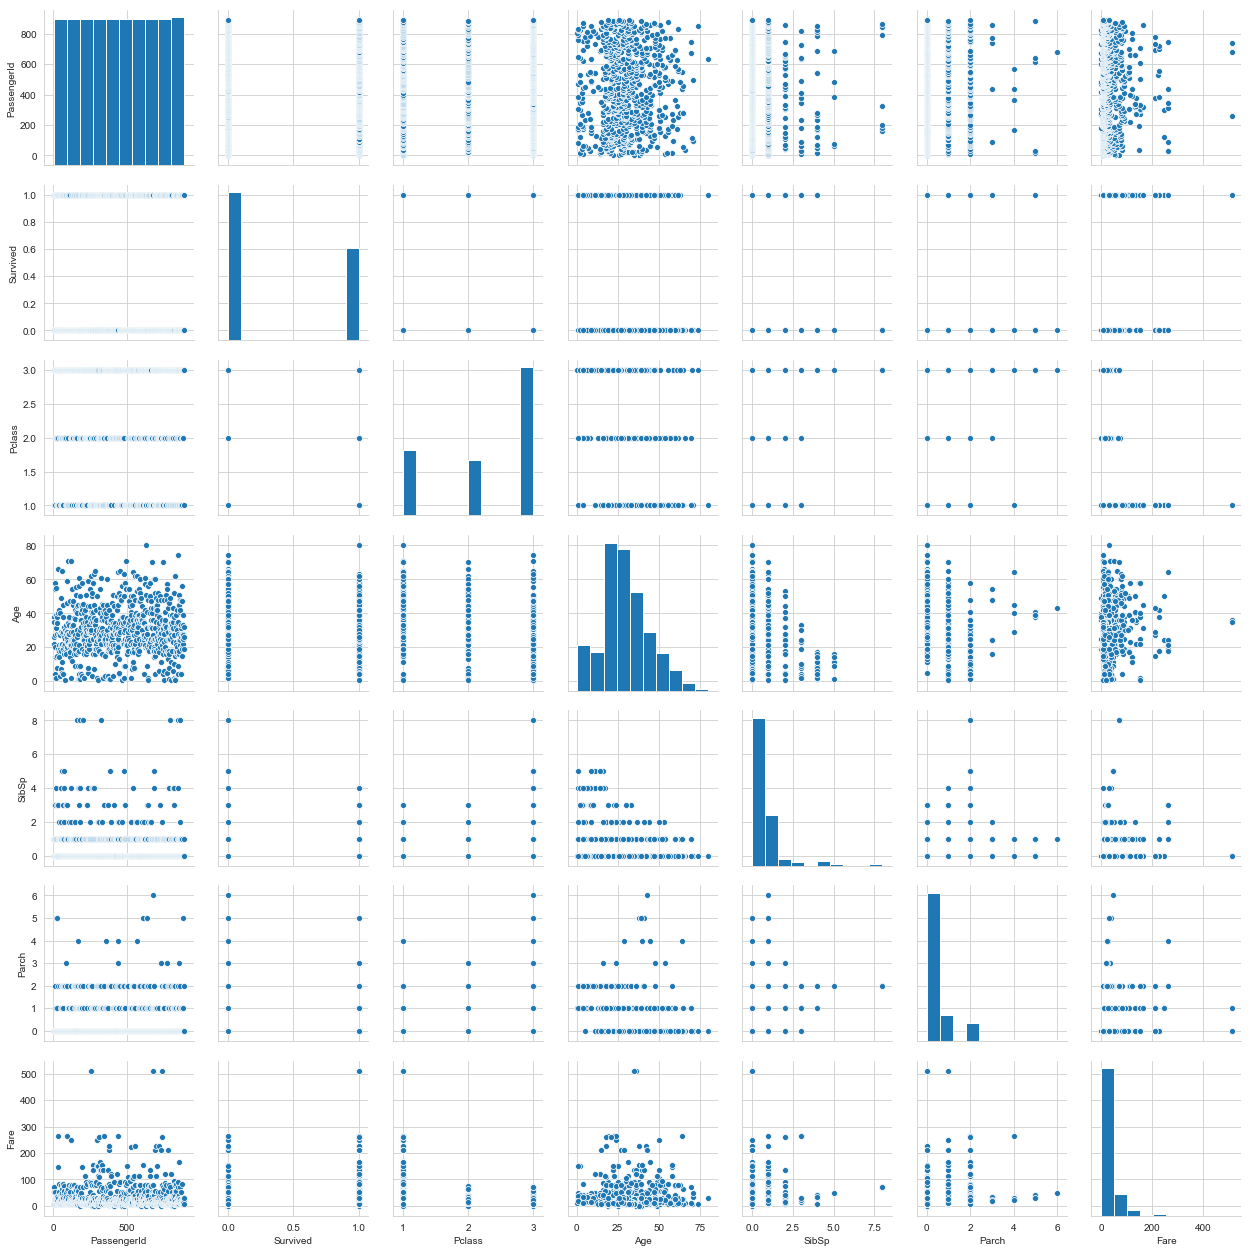

In [57]:
sns.pairplot(train)

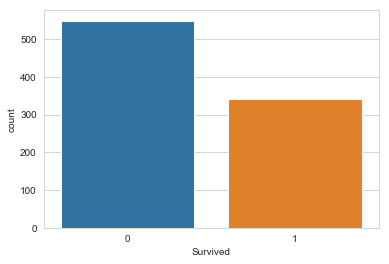

In [55]:
sns.countplot(x='Survived',data = train)

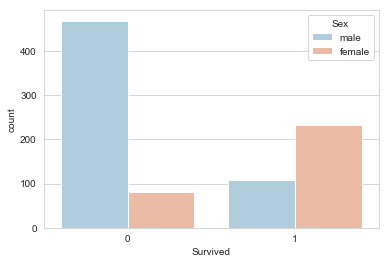

In [65]:
# how much of each sex survived
sns.countplot(x='Survived', hue ='Sex',data = train, palette = 'RdBu_r')

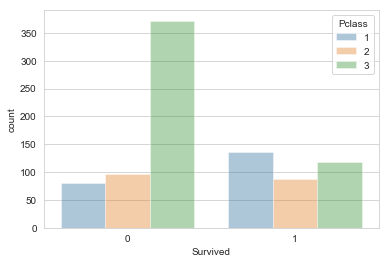

In [64]:
#how much of each class survived
sns.countplot(x='Survived', hue ='Pclass',data = train, alpha = 0.4)

[]

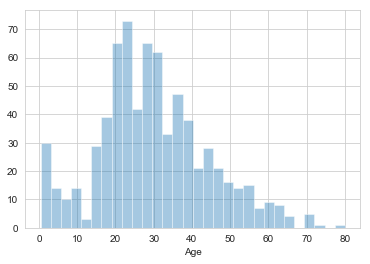

In [74]:
# distribution of the age
sns.distplot(train['Age'].dropna(),kde = False, bins = 30)

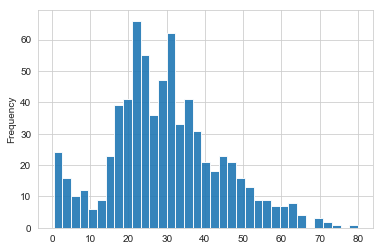

In [75]:
train['Age'].plot.hist(bins=35, alpha = 0.9)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


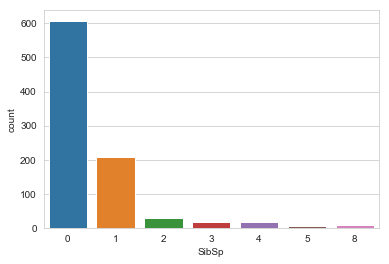

In [79]:
sns.countplot(x="SibSp",data = train)

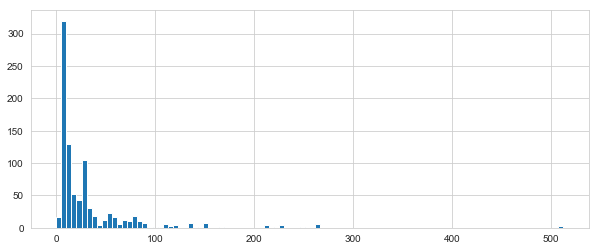

In [84]:
train['Fare'].hist(bins = 100,figsize=(10,4))

In [85]:
import cufflinks as cf
cf.go_offline()

In [87]:
train['Fare'].iplot(kind = 'hist', bins = 40)

### 02 - Cleaning the Data

#### Inputation

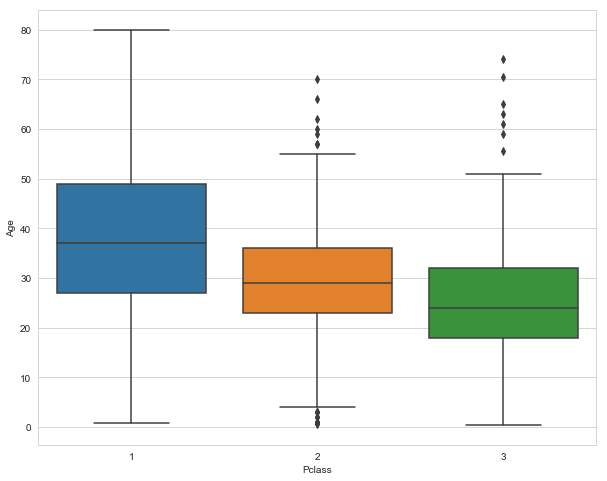

In [90]:
plt.figure(figsize=(10,8))
sns.boxplot(x ='Pclass', y ='Age', data = train)

In [96]:
#more older people in 1th class

In [106]:
#mean accourding to the 1th class
train[train['Pclass'] == 1]['Age'].mean()

38.06212962962963

In [108]:
#mean accourding to the 2th class
train[train['Pclass'] == 2]['Age'].mean()

29.82516304347826

In [110]:
#mean accourding to the 3th class
train[train['Pclass'] == 3]['Age'].mean()

24.82468431771894

In [111]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 38.62
        elif Pclass ==2:
            return 29.82
        else:
            return 24.82
    else:
        return Age

In [95]:
train['Age'] =  train[['Age', 'Pclass']].apply(impute_age,axis = 1)

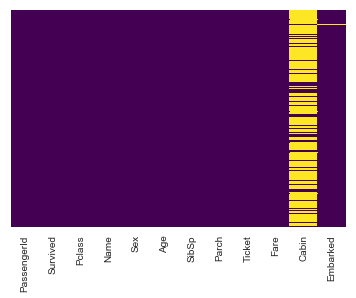

In [114]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')

In [119]:
columns = train.columns
for i in columns:
    print('%s column has %i entries and has %i null values ' % (i,len(train[i]),train[i].isnull().sum()))

PassengerId column has 891 entries and has 0 null values 
Survived column has 891 entries and has 0 null values 
Pclass column has 891 entries and has 0 null values 
Name column has 891 entries and has 0 null values 
Sex column has 891 entries and has 0 null values 
Age column has 891 entries and has 0 null values 
SibSp column has 891 entries and has 0 null values 
Parch column has 891 entries and has 0 null values 
Ticket column has 891 entries and has 0 null values 
Fare column has 891 entries and has 0 null values 
Embarked column has 891 entries and has 2 null values 


In [118]:
train.drop('Cabin',axis =1,inplace= True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


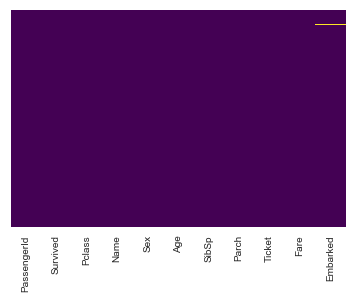

In [120]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')

In [121]:
train.dropna(inplace = True)

In [124]:
#creating the sex dataframe ( 1 == male)
sex = pd.get_dummies(train['Sex'],drop_first= True)

In [127]:
#creating the embarked dataframa( or one or other)
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [129]:
#concatenating the dataframes
train_2 = pd.concat([train,sex,embarked], axis = 1)

In [131]:
train_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [132]:
train_2.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [135]:
train_2.drop('PassengerId', axis = 1 , inplace = True)

In [136]:
train_2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### 03 - Machine Learning algo

In [146]:
X = train_2.drop('Survived', axis = 1)
y =train_2['Survived']

In [143]:
from sklearn.model_selection import train_test_split

In [145]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [147]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
logmodel = LogisticRegression()

In [148]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
predictions = logmodel.predict(X_test)

### Evaluation the model

In [151]:
from sklearn.metrics import classification_report

In [152]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [153]:
from sklearn.metrics import confusion_matrix

In [155]:
print(confusion_matrix(y_test, predictions))

[[148  15]
 [ 36  68]]


### improving the model 